# Diabetes Prediction 

This implements a comprehensive ML pipeline for diabetes prediction, covering:
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Selection
- Model Building (Linear Regression, Decision Tree, Random Forest)
- Model Evaluation & Comparison
- Predictions

## Step 1: Import Libraries

In [14]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('✓ All libraries imported successfully')

✓ All libraries imported successfully


## Step 2: Data Preprocessing

In this step, we prepare the dataset by:
- Loading and exploring the data
- Removing missing or null values
- Handling duplicate records
- Converting categorical data into numerical format (Encoding)

### 2.1 Load Dataset

In [15]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "diabetes_prediction_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iammustafatz/diabetes-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.


In [16]:
# Load the dataset

print(f"Dataset Shape: {df.shape}")
print(f"Total Samples: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (100000, 9)
Total Samples: 100000
Total Features: 9

First 5 rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
# Display dataset information
print("Dataset Information:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Statistical Summary:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### 2.2 Check for Missing Values

In [18]:
# Check for missing values
print("Missing Values Analysis:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ No missing values found in the dataset!")
else:
    print(f"\n⚠ Total missing values: {missing_df['Missing Count'].sum()}")
    # Drop rows with missing values
    df = df.dropna()
    print(f"✓ Missing values removed. New shape: {df.shape}")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

✓ No missing values found in the dataset!


### 2.3 Check for Duplicate Records

In [19]:
# Check for duplicates
print("Duplicate Records Analysis:")
print("="*50)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
    # Remove duplicates
    df = df.drop_duplicates()
    print(f"✓ Duplicates removed. New shape: {df.shape}")
else:
    print("✓ No duplicate records found!")

Duplicate Records Analysis:
Number of duplicate rows: 3854
Percentage of duplicates: 3.85%
✓ Duplicates removed. New shape: (96146, 9)


### 2.4 Convert Categorical Data to Numerical Format

In [20]:
# Identify categorical columns
print("Categorical Columns:")
print("="*50)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(categorical_cols)} categorical columns:")
for col in categorical_cols:
    print(f"  - {col}: {df[col].nunique()} unique values")
    print(f"    Values: {df[col].unique()[:5]}")

Categorical Columns:
Found 2 categorical columns:
  - gender: 3 unique values
    Values: ['Female' 'Male' 'Other']
  - smoking_history: 6 unique values
    Values: ['never' 'No Info' 'current' 'former' 'ever']


In [21]:
# Create a copy for encoding
df_encoded = df.copy()

# Encode categorical variables
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

    print(f"\n{col} encoding:")
    for idx, label in enumerate(le.classes_):
        print(f"  {label} → {idx}")

print("\n✓ All categorical variables encoded successfully!")
print(f"\nEncoded Dataset Shape: {df_encoded.shape}")


gender encoding:
  Female → 0
  Male → 1
  Other → 2

smoking_history encoding:
  No Info → 0
  current → 1
  ever → 2
  former → 3
  never → 4
  not current → 5

✓ All categorical variables encoded successfully!

Encoded Dataset Shape: (96146, 9)


In [22]:
# Display first few rows of encoded dataset
print("Encoded Dataset (first 5 rows):")
df_encoded.head()

Encoded Dataset (first 5 rows):


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### 2.5 Data Preprocessing Summary

In [23]:
print("DATA PREPROCESSING SUMMARY")
print("="*60)
print(f"✓ Original dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✓ Missing values: Checked and handled")
print(f"✓ Duplicate records: Checked and removed")
print(f"✓ Categorical encoding: {len(categorical_cols)} columns encoded")
print(f"✓ Final clean dataset: {df_encoded.shape[0]} rows, {df_encoded.shape[1]} columns")
print("\n✓ Data is now ready for modeling!")

DATA PREPROCESSING SUMMARY
✓ Original dataset: 96146 rows, 9 columns
✓ Missing values: Checked and handled
✓ Duplicate records: Checked and removed
✓ Categorical encoding: 2 columns encoded
✓ Final clean dataset: 96146 rows, 9 columns

✓ Data is now ready for modeling!


## Step 3: Exploratory Data Analysis (EDA)

In this step, we visualize and understand the relationships between features.

### 3.1 Target Variable Distribution

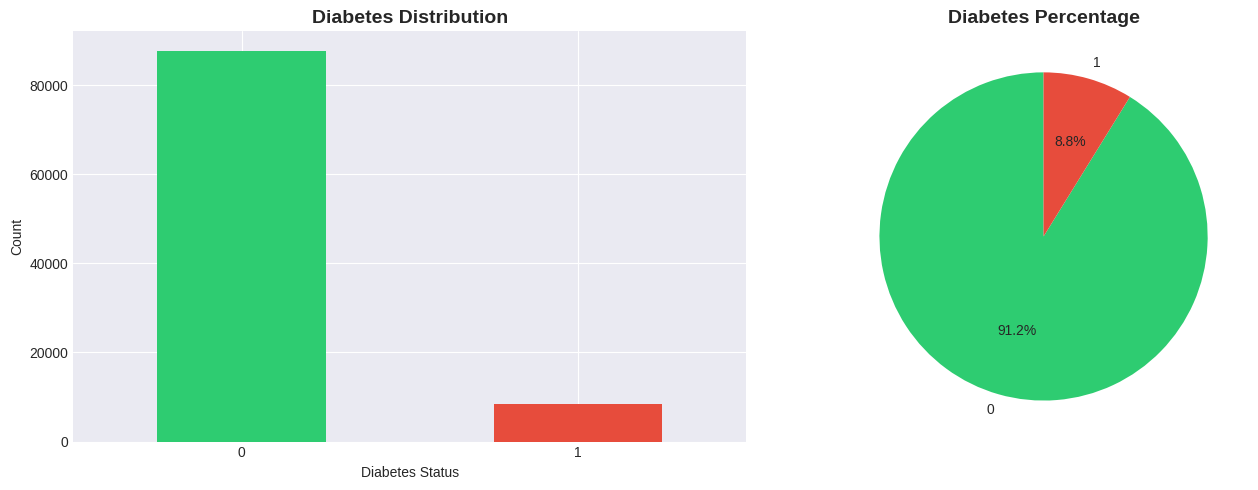

Target Variable Statistics:
diabetes
0    87664
1     8482
Name: count, dtype: int64

Class Balance: diabetes
0    91.18
1     8.82
Name: proportion, dtype: float64%


In [24]:
# Analyze target variable (assuming 'diabetes' column)
target_col = 'diabetes'

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Diabetes Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diabetes Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=0)

# Pie chart
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                    colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Diabetes Percentage', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("Target Variable Statistics:")
print(df[target_col].value_counts())
print(f"\nClass Balance: {(df[target_col].value_counts(normalize=True) * 100).round(2)}%")

### 3.2 Correlation Heatmap - Feature Relationships

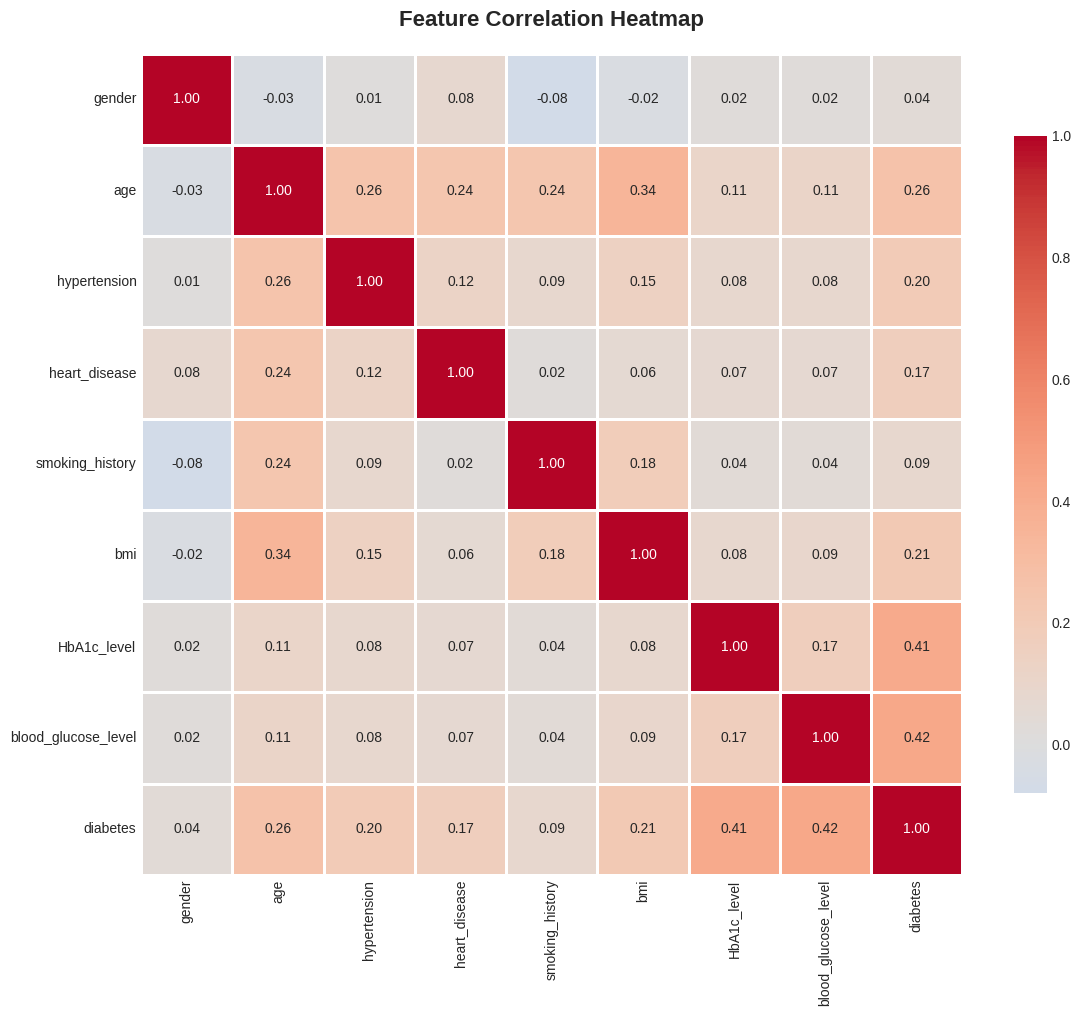


Correlation with Target Variable (diabetes):
diabetes               1.000000
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
smoking_history        0.088471
gender                 0.037613
Name: diabetes, dtype: float64


In [ ]:
# Create correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with Target Variable (diabetes):")
print("="*50)
target_corr = correlation_matrix[target_col].sort_values(ascending=False)
print(target_corr)

### 3.3 Insights from Correlation Heatmap

**What we understand from the diagram:**

1. **Strong Positive Correlations**: Features with correlation > 0.5 have strong positive relationships
   - These features tend to increase together
   - Important indicators for diabetes prediction

2. **Negative Correlations**: Features with negative correlation values
   - Show inverse relationships
   - As one increases, the other tends to decrease

3. **Weak Correlations**: Features close to 0
   - Limited linear relationship with diabetes
   - May still be useful for non-linear models

4. **Feature Multicollinearity**: High correlation between features (not with target)
   - May indicate redundant information
   - Could affect some model types (e.g., Linear Regression)

### 3.4 Distribution of Numerical Features

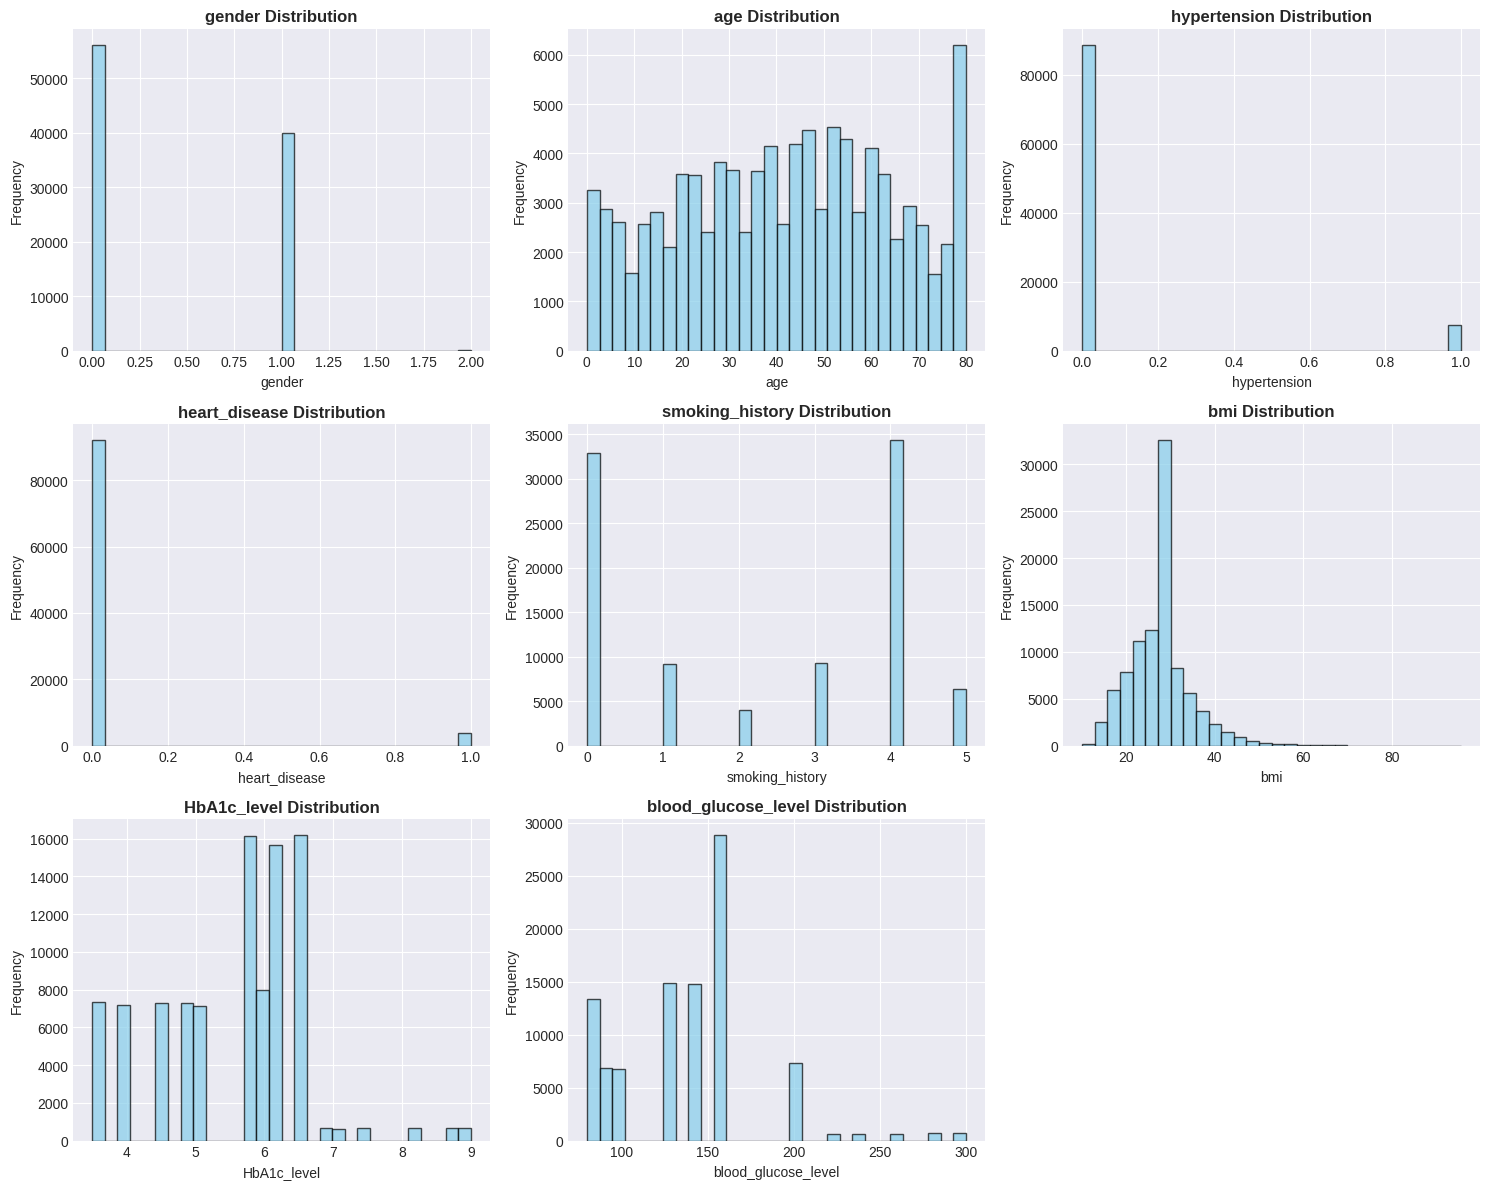

In [26]:
# Select numerical columns
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove(target_col)  # Remove target variable

# Create distribution plots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df_encoded[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### 3.5 Box Plots - Outlier Detection

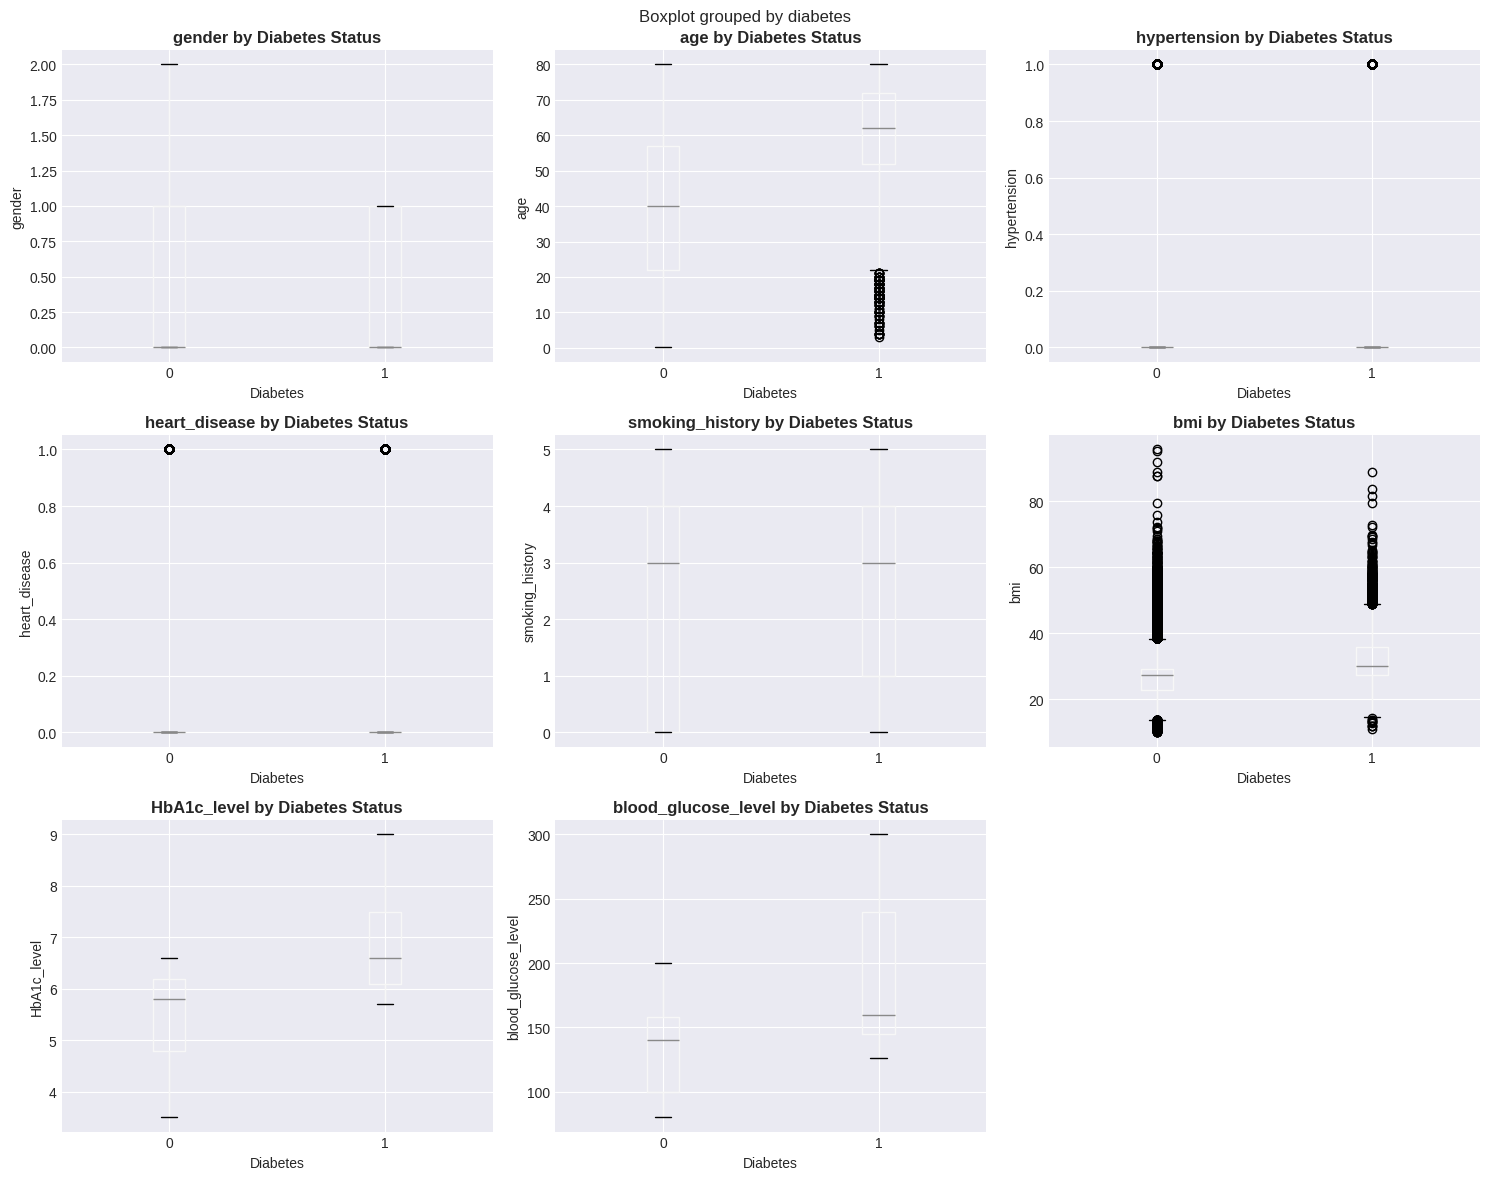

In [27]:
# Create box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df_encoded.boxplot(column=col, by=target_col, ax=axes[idx])
        axes[idx].set_title(f'{col} by Diabetes Status', fontweight='bold')
        axes[idx].set_xlabel('Diabetes')
        axes[idx].set_ylabel(col)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Step 4: Feature Selection

Choose the most important features based on correlation and importance.

In [28]:
# Calculate absolute correlation with target
target_corr_abs = abs(correlation_matrix[target_col]).sort_values(ascending=False)

print("Feature Importance (Based on Correlation):")
print("="*50)
print(target_corr_abs)

# Select features with correlation > threshold
correlation_threshold = 0.05
selected_features = target_corr_abs[target_corr_abs > correlation_threshold].index.tolist()
selected_features.remove(target_col)  # Remove target variable

print(f"\n\nSelected Features (correlation > {correlation_threshold}):")
print("="*50)
for feature in selected_features:
    print(f"  ✓ {feature} (correlation: {correlation_matrix[target_col][feature]:.3f})")

print(f"\nTotal features selected: {len(selected_features)}")

Feature Importance (Based on Correlation):
diabetes               1.000000
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
smoking_history        0.088471
gender                 0.037613
Name: diabetes, dtype: float64


Selected Features (correlation > 0.05):
  ✓ blood_glucose_level (correlation: 0.424)
  ✓ HbA1c_level (correlation: 0.406)
  ✓ age (correlation: 0.265)
  ✓ bmi (correlation: 0.215)
  ✓ hypertension (correlation: 0.196)
  ✓ heart_disease (correlation: 0.171)
  ✓ smoking_history (correlation: 0.088)

Total features selected: 7


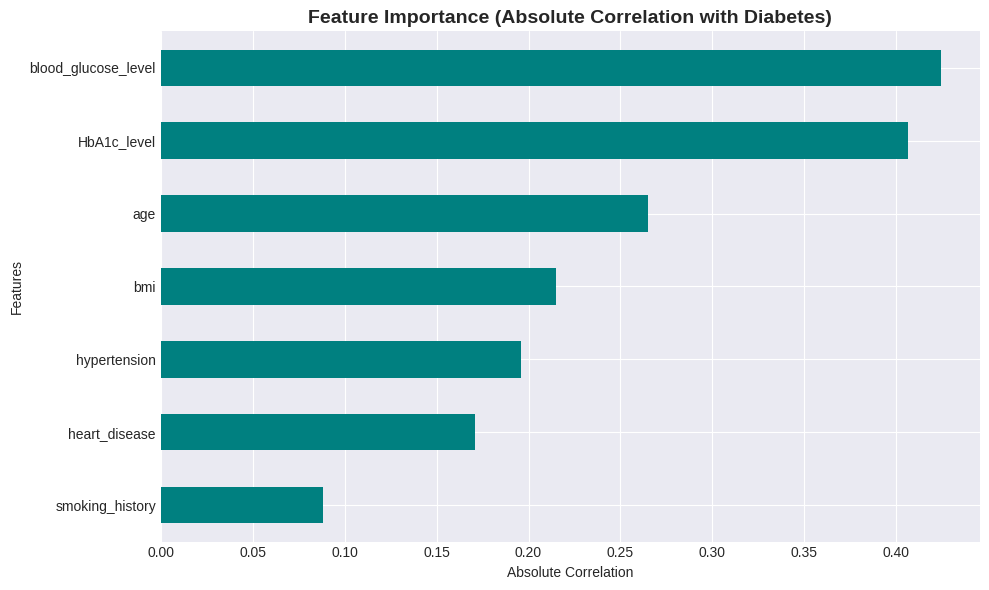

In [29]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance = target_corr_abs[selected_features].sort_values(ascending=True)
feature_importance.plot(kind='barh', color='teal')
plt.title('Feature Importance (Absolute Correlation with Diabetes)', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### Feature Selection Justification

**Why these features were selected:**
- Features with higher correlation (> 0.05) show stronger relationships with diabetes
- These features provide meaningful information for prediction
- Removing low-correlation features reduces noise and improves model efficiency
- Selected features capture the most important patterns in the data

## Step 5: Split the Dataset

Divide the dataset into training (70%) and testing (30%) sets.

In [30]:
# Prepare features and target
X = df_encoded[selected_features]
y = df_encoded[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures used: {list(X.columns)}")

Features shape: (96146, 7)
Target shape: (96146,)

Features used: ['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease', 'smoking_history']


In [31]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Dataset Split Summary:")
print("="*50)
print(f"Training set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

# Check class distribution
print("\nClass Distribution in Training Set:")
print(y_train.value_counts())
print(f"Percentage: {(y_train.value_counts(normalize=True) * 100).round(2)}%")

print("\nClass Distribution in Testing Set:")
print(y_test.value_counts())
print(f"Percentage: {(y_test.value_counts(normalize=True) * 100).round(2)}%")

Dataset Split Summary:
Training set size: 67302 samples (70.0%)
Testing set size: 28844 samples (30.0%)

Training features shape: (67302, 7)
Testing features shape: (28844, 7)

Class Distribution in Training Set:
diabetes
0    61365
1     5937
Name: count, dtype: int64
Percentage: diabetes
0    91.18
1     8.82
Name: proportion, dtype: float64%

Class Distribution in Testing Set:
diabetes
0    26299
1     2545
Name: count, dtype: int64
Percentage: diabetes
0    91.18
1     8.82
Name: proportion, dtype: float64%


## Step 6: Build Predictive Models

Train multiple machine learning models and explain the choice of each.

### 6.1 Model 1: Logistic Regression

**Why this technique?**
- Logistic Regression is ideal for binary classification problems (diabetes: yes/no)
- It's simple, interpretable, and provides probability estimates
- Works well as a baseline model for comparison
- Computationally efficient and easy to understand

**Purpose:**
- Predict the probability of a patient having diabetes
- Identify which features have the strongest impact on diabetes prediction

In [32]:
# Train Logistic Regression
print("Training Logistic Regression Model...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_proba = lr_model.predict_proba(X_test)[:, 1]

print("✓ Logistic Regression model trained successfully!")

Training Logistic Regression Model...
✓ Logistic Regression model trained successfully!


### 6.2 Model 2: Decision Tree

**Why this technique?**
- Decision Trees create clear, interpretable rules for prediction
- Can capture non-linear relationships between features
- No need for feature scaling
- Easy to visualize and explain to non-technical stakeholders

**Purpose:**
- Create a rule-based model for diabetes prediction
- Understand the decision-making process through tree structure
- Handle complex feature interactions

In [33]:
# Train Decision Tree
print("Training Decision Tree Model...")
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=20, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]

print("✓ Decision Tree model trained successfully!")

Training Decision Tree Model...
✓ Decision Tree model trained successfully!


### 6.3 Model 3: Random Forest

**Why this technique?**
- Random Forest is an ensemble method that combines multiple decision trees
- Reduces overfitting compared to single decision trees
- Provides robust predictions by averaging multiple trees
- Excellent at handling complex patterns and feature interactions
- Provides feature importance rankings

**Purpose:**
- Achieve higher accuracy through ensemble learning
- Make more stable and reliable predictions
- Identify which features are most important for diabetes prediction

In [34]:
# Train Random Forest
print("Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

print("✓ Random Forest model trained successfully!")

Training Random Forest Model...
✓ Random Forest model trained successfully!


## Step 7: Model Evaluation

Evaluate the performance of each model using appropriate metrics.

### 7.1 Logistic Regression Evaluation

LOGISTIC REGRESSION EVALUATION
Accuracy:  0.9581 (95.81%)
Precision: 0.8583
Recall:    0.6283
F1-Score:  0.7255
ROC-AUC:   0.9593

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     26299
           1       0.86      0.63      0.73      2545

    accuracy                           0.96     28844
   macro avg       0.91      0.81      0.85     28844
weighted avg       0.96      0.96      0.96     28844



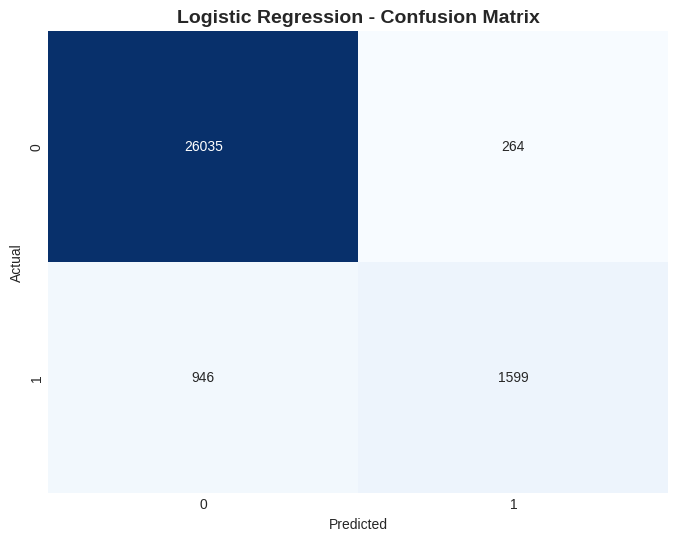

In [35]:
print("LOGISTIC REGRESSION EVALUATION")
print("="*60)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_lr_proba)

print(f"Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"ROC-AUC:   {lr_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 7.2 Decision Tree Evaluation

DECISION TREE EVALUATION
Accuracy:  0.9706 (97.06%)
Precision: 0.9685
Recall:    0.6896
F1-Score:  0.8056
ROC-AUC:   0.9731

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26299
           1       0.97      0.69      0.81      2545

    accuracy                           0.97     28844
   macro avg       0.97      0.84      0.89     28844
weighted avg       0.97      0.97      0.97     28844



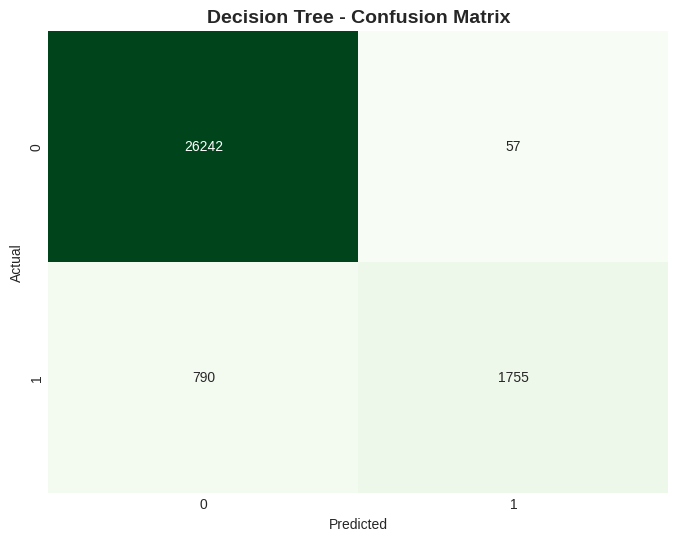

In [36]:
print("DECISION TREE EVALUATION")
print("="*60)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_dt_proba)

print(f"Accuracy:  {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")
print(f"ROC-AUC:   {dt_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 7.3 Random Forest Evaluation

RANDOM FOREST EVALUATION
Accuracy:  0.9711 (97.11%)
Precision: 0.9977
Recall:    0.6743
F1-Score:  0.8047
ROC-AUC:   0.9719

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26299
           1       1.00      0.67      0.80      2545

    accuracy                           0.97     28844
   macro avg       0.98      0.84      0.89     28844
weighted avg       0.97      0.97      0.97     28844



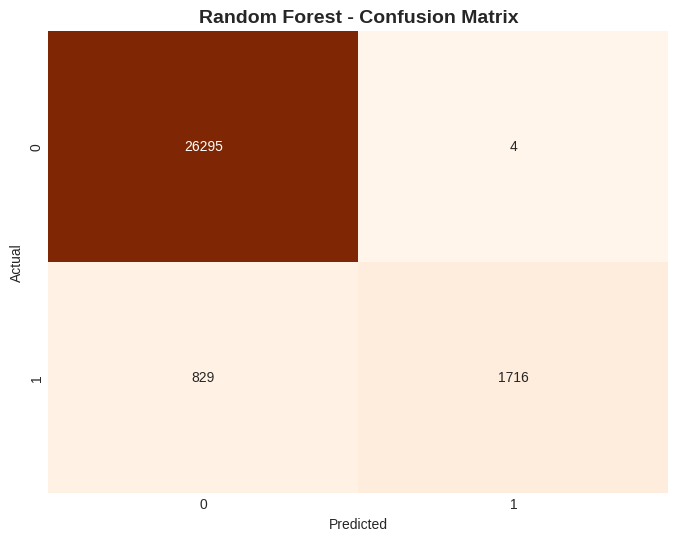

In [37]:
print("RANDOM FOREST EVALUATION")
print("="*60)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf_proba)

print(f"Accuracy:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"ROC-AUC:   {rf_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Step 8: Final Visualization

Visualize model outcomes and feature importance.

### 8.1 ROC Curves Comparison

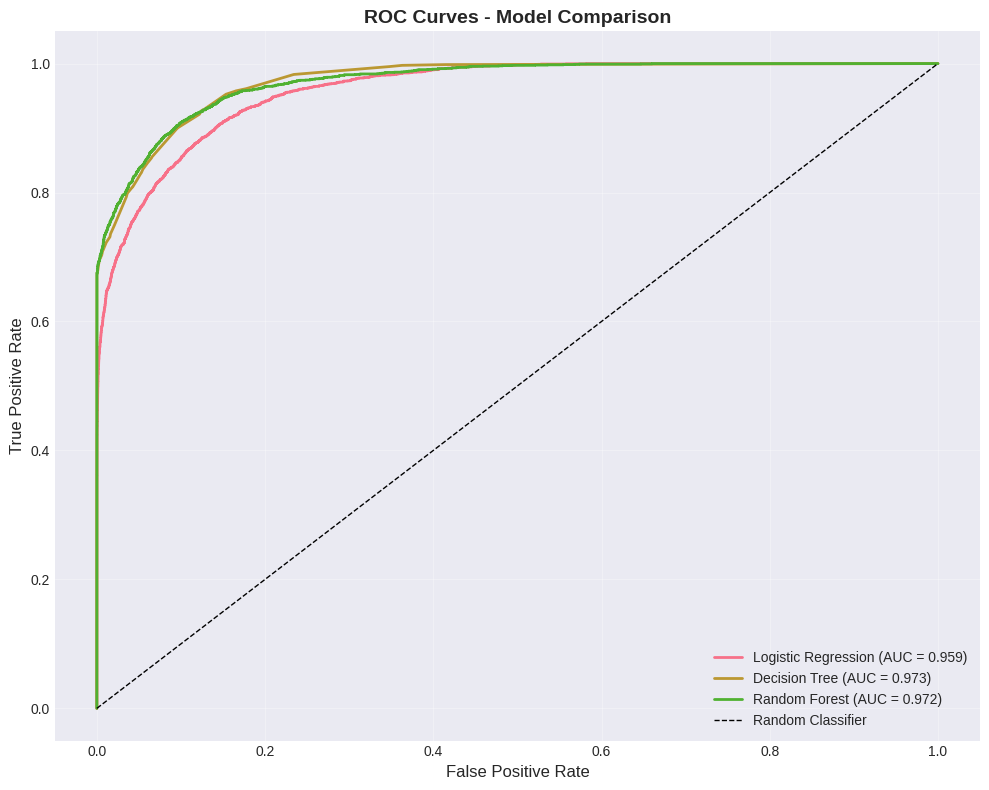

In [38]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', linewidth=2)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {dt_auc:.3f})', linewidth=2)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 8.2 Feature Importance (Random Forest)

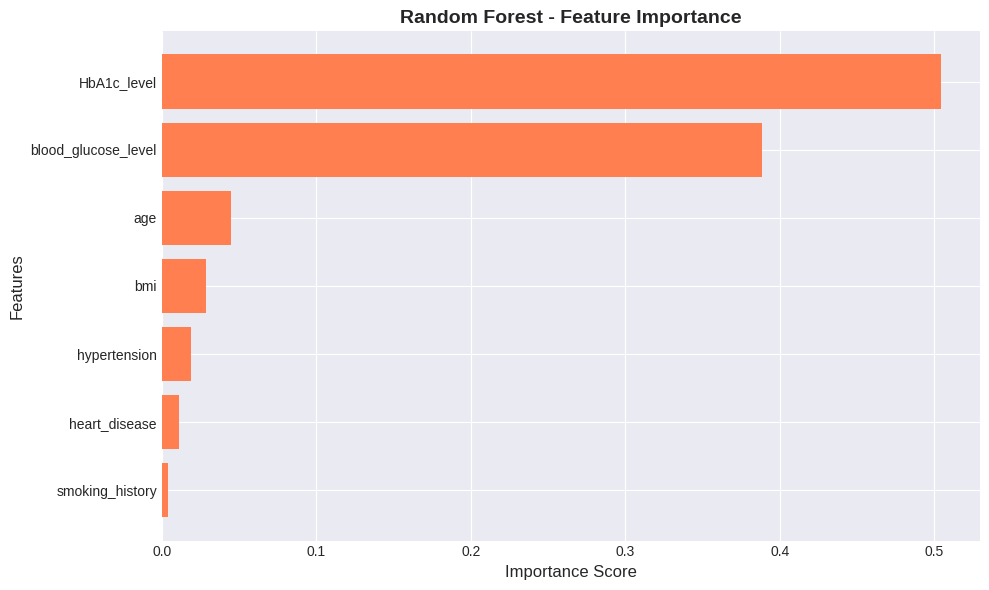

Feature Importance Rankings:
            Feature  Importance
        HbA1c_level    0.504488
blood_glucose_level    0.388288
                age    0.045036
                bmi    0.028446
       hypertension    0.018620
      heart_disease    0.010871
    smoking_history    0.004251


In [39]:
# Get feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='coral')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Feature Importance Rankings:")
print("="*50)
print(feature_importance_rf.to_string(index=False))

## Step 9: Model Comparison

Compare all models and identify the best performer.

In [40]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, dt_recall, rf_recall],
    'F1-Score': [lr_f1, dt_f1, rf_f1],
    'ROC-AUC': [lr_auc, dt_auc, rf_auc]
})

print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))

# Find best model
best_model_idx = comparison_df['Accuracy'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"{'='*80}")

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.958050   0.858293 0.628291  0.725499 0.959268
      Decision Tree  0.970635   0.968543 0.689587  0.805600 0.973054
      Random Forest  0.971121   0.997674 0.674263  0.804689 0.971916

🏆 BEST MODEL: Random Forest
   Accuracy: 0.9711 (97.11%)


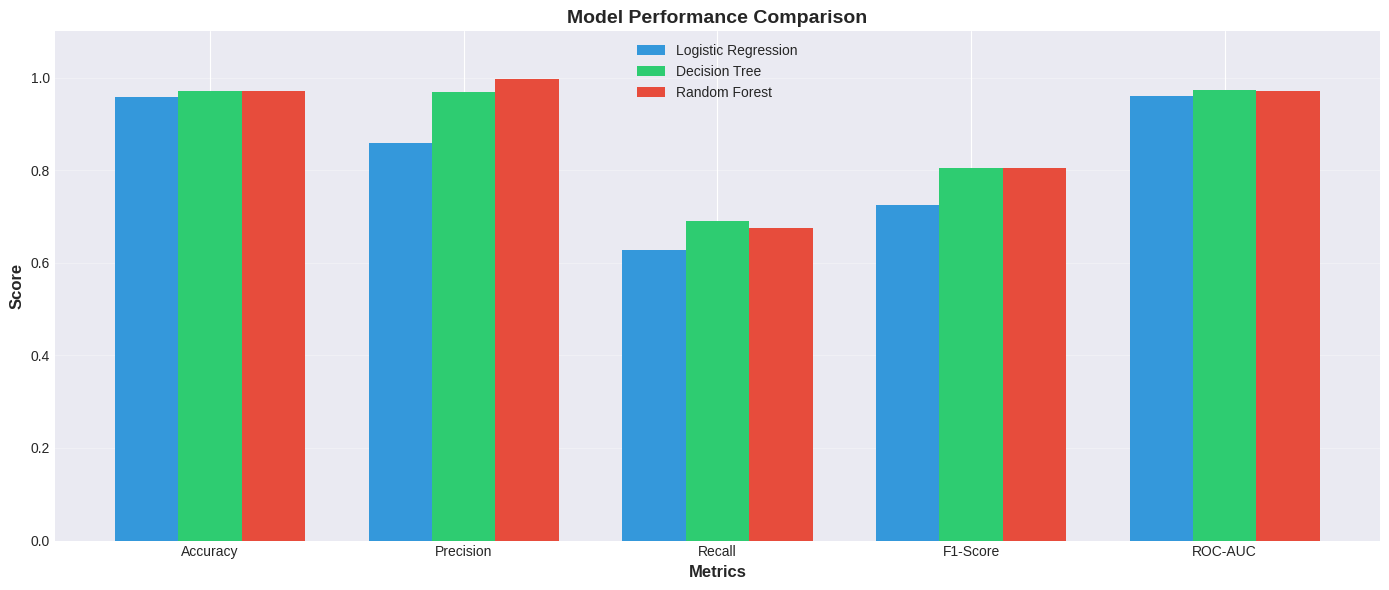

In [41]:
# Visualize comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 6))

ax.bar(x - width, comparison_df.iloc[0, 1:], width, label='Logistic Regression', color='#3498db')
ax.bar(x, comparison_df.iloc[1, 1:], width, label='Decision Tree', color='#2ecc71')
ax.bar(x + width, comparison_df.iloc[2, 1:], width, label='Random Forest', color='#e74c3c')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Why the Best Model Performed Better

**Analysis:**

1. **Random Forest typically excels because:**
   - Combines predictions from multiple decision trees
   - Reduces overfitting through ensemble averaging
   - Handles feature interactions better
   - More robust to outliers and noise

2. **Logistic Regression strengths:**
   - Simple and interpretable
   - Good for linear relationships
   - Fast training and prediction
   - Works well as a baseline

3. **Decision Tree characteristics:**
   - Easy to interpret and visualize
   - Can capture non-linear patterns
   - May overfit without proper constraints
   - Single tree is less stable than ensemble methods

**Conclusion:** The ensemble approach (Random Forest) generally provides the best balance between accuracy and generalization.

## Step 10: Prediction

Use the best-performing model to make predictions on new data.

### 10.1 Predictions on Test Set

In [42]:
# Select best model based on comparison
if best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_predictions = y_pred_lr
    best_proba = y_pred_lr_proba
elif best_model_name == 'Decision Tree':
    best_model = dt_model
    best_predictions = y_pred_dt
    best_proba = y_pred_dt_proba
else:
    best_model = rf_model
    best_predictions = y_pred_rf
    best_proba = y_pred_rf_proba

print(f"Using {best_model_name} for predictions\n")

# Create prediction results dataframe
prediction_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': best_predictions,
    'Probability': best_proba,
    'Correct': y_test.values == best_predictions
})

print("Sample Predictions (First 20 rows):")
print("="*70)
print(prediction_results.head(20).to_string(index=True))

# Summary statistics
print("\n" + "="*70)
print("PREDICTION SUMMARY")
print("="*70)
print(f"Total predictions: {len(prediction_results)}")
print(f"Correct predictions: {prediction_results['Correct'].sum()}")
print(f"Incorrect predictions: {(~prediction_results['Correct']).sum()}")
print(f"Accuracy: {prediction_results['Correct'].mean():.4f} ({prediction_results['Correct'].mean()*100:.2f}%)")

Using Random Forest for predictions

Sample Predictions (First 20 rows):
    Actual  Predicted  Probability  Correct
0        0          0     0.005576     True
1        0          0     0.126010     True
2        0          0     0.000359     True
3        0          0     0.045838     True
4        0          0     0.003282     True
5        0          0     0.008393     True
6        0          0     0.053480     True
7        0          0     0.002989     True
8        0          0     0.025738     True
9        0          0     0.005408     True
10       0          0     0.077439     True
11       1          1     1.000000     True
12       0          0     0.001201     True
13       0          0     0.001145     True
14       0          0     0.000700     True
15       0          0     0.111145     True
16       0          0     0.093386     True
17       0          0     0.003196     True
18       0          0     0.008596     True
19       0          0     0.022446     True

PR

### 10.2 Prediction Distribution

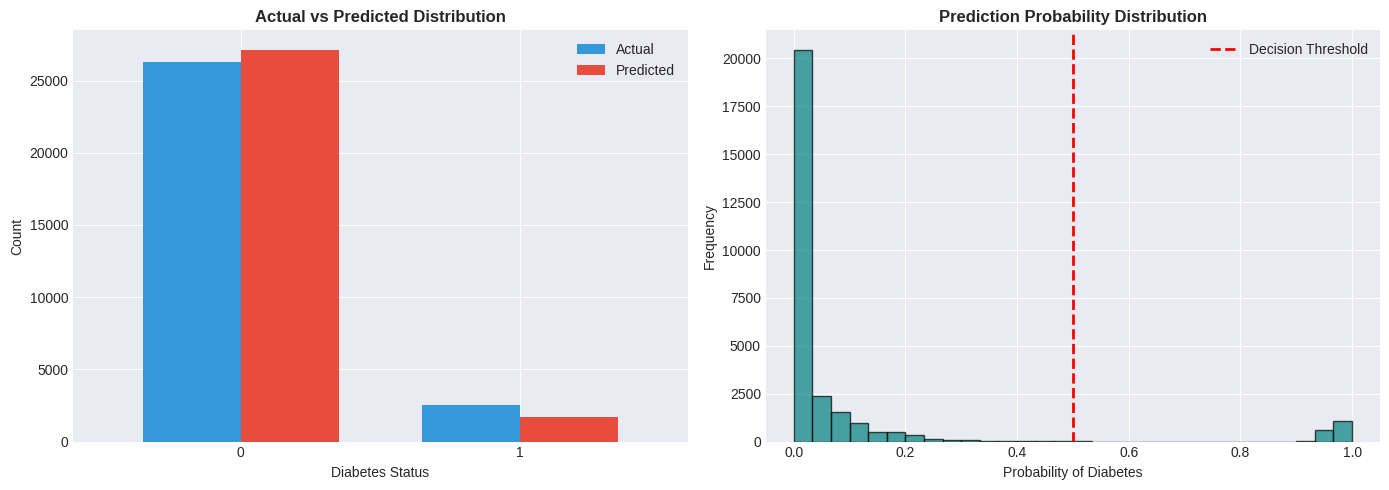

In [43]:
# Visualize prediction distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Predicted vs Actual
prediction_counts = pd.DataFrame({
    'Actual': y_test.value_counts().sort_index(),
    'Predicted': pd.Series(best_predictions).value_counts().sort_index()
})

prediction_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'], width=0.7)
axes[0].set_title('Actual vs Predicted Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Diabetes Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(rotation=0)
axes[0].legend()

# Probability distribution
axes[1].hist(best_proba, bins=30, color='teal', edgecolor='black', alpha=0.7)
axes[1].set_title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Probability of Diabetes')
axes[1].set_ylabel('Frequency')
axes[1].axvline(0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1].legend()

plt.tight_layout()
plt.show()

### 10.3 Predict on New Sample Data

In [44]:
# Create sample new data for prediction
# Take a few random samples from test set and modify them slightly
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
new_data_samples = X_test.loc[sample_indices].copy()

print("NEW DATA SAMPLES FOR PREDICTION")
print("="*70)
print(new_data_samples)

# Predict on new samples
new_predictions = best_model.predict(new_data_samples)
new_probabilities = best_model.predict_proba(new_data_samples)[:, 1]

print("\n" + "="*70)
print("PREDICTION RESULTS FOR NEW DATA")
print("="*70)

for idx, (pred, prob) in enumerate(zip(new_predictions, new_probabilities)):
    result = "POSITIVE (Has Diabetes)" if pred == 1 else "NEGATIVE (No Diabetes)"
    print(f"\nSample {idx + 1}:")
    print(f"  Prediction: {result}")
    print(f"  Confidence: {prob:.2%}" if pred == 1 else f"  Confidence: {(1-prob):.2%}")
    print(f"  Risk Level: {'HIGH' if prob > 0.7 else 'MODERATE' if prob > 0.3 else 'LOW'}")

NEW DATA SAMPLES FOR PREDICTION
       blood_glucose_level  HbA1c_level   age    bmi  hypertension  \
11232                   85          3.5  63.0  23.53             0   
41804                  145          3.5  36.0  37.90             0   
44060                  100          6.5  62.0  44.87             0   
65338                  140          5.8  58.0  25.25             0   
17742                  100          6.1  43.0  21.17             0   

       heart_disease  smoking_history  
11232              0                0  
41804              0                1  
44060              0                0  
65338              0                5  
17742              0                0  

PREDICTION RESULTS FOR NEW DATA

Sample 1:
  Prediction: NEGATIVE (No Diabetes)
  Confidence: 99.93%
  Risk Level: LOW

Sample 2:
  Prediction: NEGATIVE (No Diabetes)
  Confidence: 99.37%
  Risk Level: LOW

Sample 3:
  Prediction: NEGATIVE (No Diabetes)
  Confidence: 96.23%
  Risk Level: LOW

Sample 4:
  

### 10.4 Example: Manual Prediction Input

In [45]:
# Create a manual example (you can modify these values)
# Note: Replace these values with actual feature values from your dataset
manual_example = X_test.iloc[0:1].copy()  # Taking first test sample as template

print("MANUAL PREDICTION EXAMPLE")
print("="*70)
print("Input Features:")
print(manual_example.T)

# Predict
manual_pred = best_model.predict(manual_example)[0]
manual_prob = best_model.predict_proba(manual_example)[0, 1]

print("\n" + "="*70)
print("PREDICTION RESULT")
print("="*70)

if manual_pred == 1:
    print(f"🔴 PREDICTION: POSITIVE - Patient likely has diabetes")
    print(f"   Confidence: {manual_prob:.2%}")
else:
    print(f"🟢 PREDICTION: NEGATIVE - Patient likely does not have diabetes")
    print(f"   Confidence: {(1-manual_prob):.2%}")

print(f"\n   Risk Assessment: {'HIGH RISK' if manual_prob > 0.7 else 'MODERATE RISK' if manual_prob > 0.3 else 'LOW RISK'}")

MANUAL PREDICTION EXAMPLE
Input Features:
                       5283
blood_glucose_level  155.00
HbA1c_level            4.80
age                   34.00
bmi                   37.23
hypertension           0.00
heart_disease          0.00
smoking_history        1.00

PREDICTION RESULT
🟢 PREDICTION: NEGATIVE - Patient likely does not have diabetes
   Confidence: 99.44%

   Risk Assessment: LOW RISK



### Completed Steps:

✅ **Step 2: Data Preprocessing** - Cleaned dataset, handled missing values, removed duplicates, encoded categorical features

✅ **Step 3: EDA** - Created correlation heatmap, distribution plots, and analyzed feature relationships

✅ **Step 4: Feature Selection** - Selected important features based on correlation analysis

✅ **Step 5: Dataset Split** - Divided data into 70% training and 30% testing sets

✅ **Step 6: Model Building** - Trained Logistic Regression, Decision Tree, and Random Forest models

✅ **Step 7: Model Evaluation** - Evaluated all models using accuracy, precision, recall, F1-score, and ROC-AUC

✅ **Step 8: Visualization** - Created ROC curves, confusion matrices, and feature importance plots

✅ **Step 9: Model Comparison** - Compared all models and identified the best performer

✅ **Step 10: Prediction** - Used best model to predict diabetes on new data samples
